

---


## ☘️ PLANT DISEASE DETECTION AND VALIDATION USING DIFFERENT MODELS ☘️

<img src = "https://www.plantandfood.co.nz/growingfutures/images/case-study-grapevine-leafroll-testing-banner.jpg" length = 300>



---




According to the Food and Agriculture organization of the United Nations (UN), transboundary plant pests and diseases affect food crops, causing significant losses to farmers and threatening food security.

Plant diseases contribute 10–16% losses in the global harvest of crops each year costing an estimated US$220 billion. According to a report of the Food and Agriculture Organization (FAO), our world population is anticipated to hit 9.1 billion in 2050. Therefore, agricultural production needs to be increased up to 70% to fulfill the food requirements of a steadily growing population. On the other hand, abundant use of chemicals such as bactericides, fungicides, and nematicides to control plant diseases has been causing adverse effects in the agro-ecosystem. Currently, there is a need for effective early disease detection techniques to control plant diseases for food security and sustainability of agro-ecosystem.


---


In this notebook we will be implementing a deep learning model that can identify plant diseases, using Keras framework, a Convolutional Neural Network (CNN) architecture. The goal is to detect different plant diseases by looking a picture.








In [ ]:
#importing libraries
import pandas as pd
from tensorflow.keras.optimizers import RMSprop
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import Model
from keras import Model
from os import getcwd
from keras.layers import Dense, Activation, BatchNormalization
import tensorflow as tf

##### Kaggle dataset import

In [ ]:
!pip install ipython-autotime

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kushagra180","key":"c851254106f8a95965aff169fb5ffc98"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d vipoooool/new-plant-diseases-dataset

100% 2.70G/2.70G [00:45<00:00, 89.8MB/s]



In [ ]:
!unzip "/content/new-plant-diseases-dataset.zip"

### Image Vizualisation

In [ ]:
train_folder = "/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train"

In [ ]:
diseases = os.listdir(train_folder)

NameError: ignored

In [ ]:
print("Total disease classes are: {}".format(len(diseases)))

Total disease classes are: 38


In [ ]:
plants = []
NumberOfDiseases = 0
for plant in diseases:
    if plant.split('___')[0] not in plants:
        plants.append(plant.split('___')[0])        potato__healthy__
    if plant.split('___')[1] != 'healthy':          potoato healthy
        NumberOfDiseases += 1

In [ ]:
print(f"Unique Plants in the dataset are: \n{plants}")
print("Number of plants: {}".format(len(plants)))

NameError: ignored

In [ ]:
print("Number of diseases: {}".format(NumberOfDiseases))

Number of diseases: 26


In [ ]:
nums = {}
for disease in diseases:
    nums[disease] = len(os.listdir(train_folder + '/' + disease))

In [ ]:
img_per_class = pd.DataFrame(nums.values(), index=nums.keys(), columns=["no. of images"])
img_per_class

no. of images
Tomato___Target_Spot                                         1827
Potato___healthy                                             1824
Squash___Powdery_mildew                                      1736
Orange___Haunglongbing_(Citrus_greening)                     2010
Raspberry___healthy                                          1781
Tomato___Spider_mites Two-spotted_spider_mite                1741
Tomato___Septoria_leaf_spot                                  1745
Tomato___healthy                                             1926
Grape___healthy                                              1692
Apple___Black_rot                                            1987
Tomato___Tomato_Yellow_Leaf_Curl_Virus                       1961
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot           1642
Blueberry___healthy                                          1816
Pepper,_bell___healthy                                       1988
Tomato___Leaf_Mold                                           1882
Corn_(maize)___Northern_Leaf_Blight                          1908
Tomato___Tomato_mosaic_virus                                 1790
Strawberry___healthy                                         1824
Corn_(maize)___healthy                                       1859
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)                   1722
Apple___Cedar_apple_rust                                     1760
Corn_(maize)___Common_rust_                                  1907
Grape___Esca_(Black_Measles)                                 1920
Soybean___healthy                                            2022
Tomato___Late_blight                                         1851
Peach___Bacterial_spot                                       1838
Apple___healthy                                              2008
Tomato___Early_blight                                        1920
Potato___Early_blight                                        1939
Apple___Apple_scab                                           2016
Potato___Late_blight                                         1939
Peach___healthy                                              1728
Cherry_(including_sour)___Powdery_mildew                     1683
Tomato___Bacterial_spot                                      1702
Strawberry___Leaf_scorch                                     1774
Grape___Black_rot                                            1888
Cherry_(including_sour)___healthy                            1826
Pepper,_bell___Bacterial_spot                                1913

Text(0.5, 1.0, 'Images per each class of plant disease')

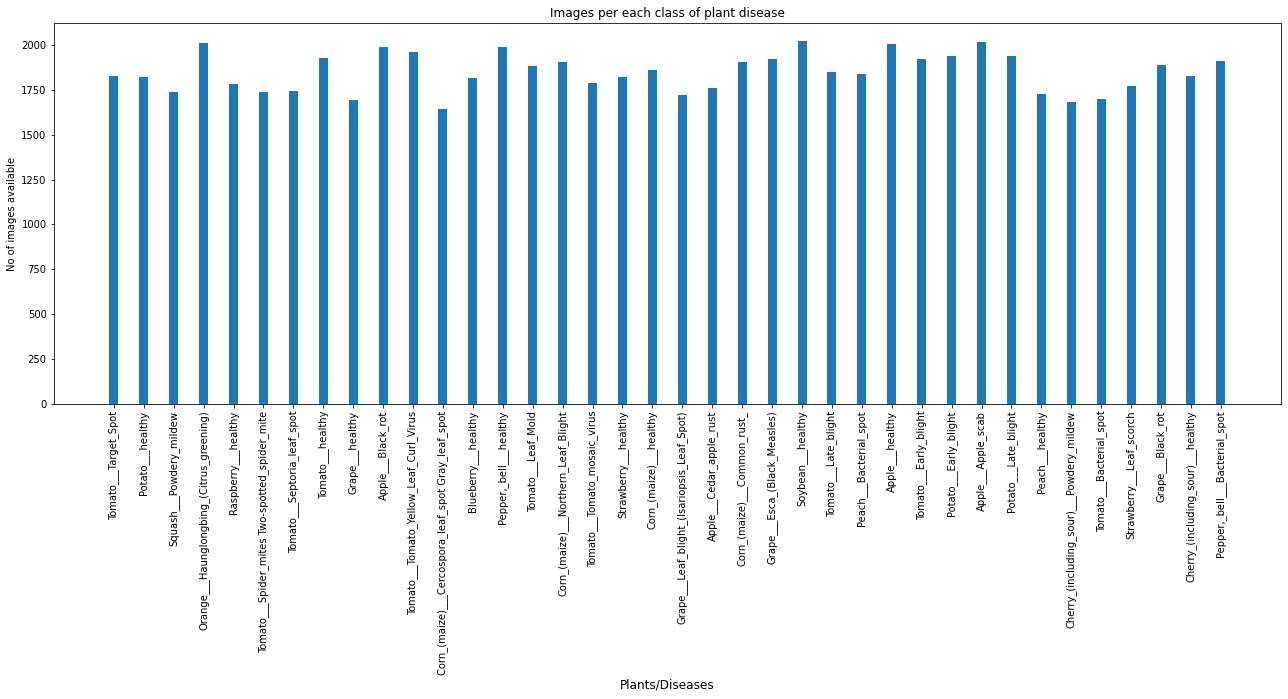

In [ ]:
index = [n for n in range(38)]
plt.figure(figsize=(22, 7))
plt.bar(index, [n for n in nums.values()], width=0.3)
plt.xlabel('Plants/Diseases', fontsize=12)
plt.ylabel('No of images available', fontsize=10)
plt.xticks(index, diseases, fontsize=10, rotation=90)
plt.title('Images per each class of plant disease')

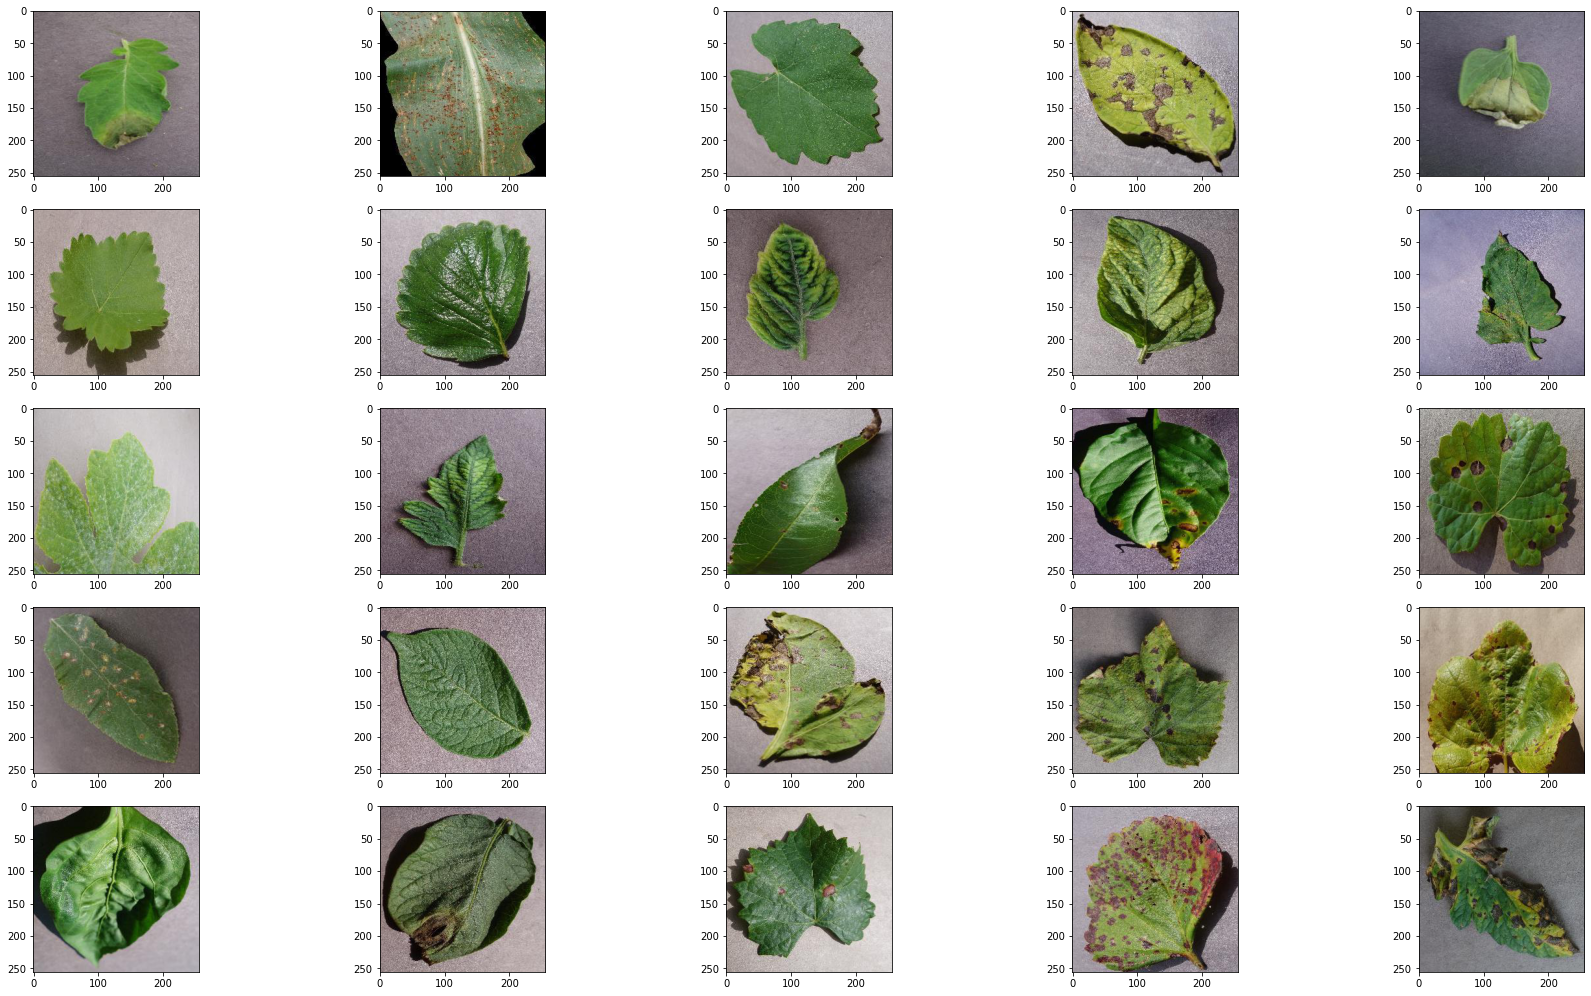

In [ ]:
import random
from PIL import Image

images = []
for folder in os.listdir(train_folder):
  for image in os.listdir(train_folder + '/' + folder):
    images.append(os.path.join(train_folder, folder, image))

plt.figure(1, figsize=(30, 25))
plt.axis('off')
n = 0
for i in range(25):
  n += 1
  random_img = random.choice(images)
  imgs = mpimg.imread(random_img)
  plt.subplot(7, 5, n)
  plt.imshow(imgs)

plt.show()

### Data Augmentation and UDF

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
TRAINING_DIR = '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train'
TESTING_DIR = '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid'

train_datagen = ImageDataGenerator
(
    rescale=1 / 255,
    rotation_range = 40,
    width_shift_range= .2,
    height_shift_range=.2,
    shear_range=.2,
    #validation_split=0.05,
    zoom_range=.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    batch_size=128,
    class_mode='categorical',
    target_size = (150, 150)   #150px X 150px -> 1024px X 1024px = 1 Megapixel
)


validation_generator = test_datagen.flow_from_directory(
    TESTING_DIR,
    batch_size = 128,
    class_mode='categorical',
    target_size=(150, 150)
)

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [ ]:
#for testing
test_datagen = ImageDataGenerator(rescale=1. / 255)
test_dir = "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        shuffle=False,
        class_mode = None)

Found 17572 images belonging to 38 classes.


In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint,ReduceLROnPlateau


earlyStopping = EarlyStopping(monitor='val_loss', patience = 7, verbose = 0, mode='min')
mcp_save_vgg = ModelCheckpoint(filepath='mdl_wts_vgg.hdf5', save_best_only=True, monitor='val_accuracy', mode='max')
mcp_save_own = ModelCheckpoint(filepath='mdl_wts_own.hdf5', save_best_only=True, monitor='val_accuracy', mode='max')
mcp_save_xc = ModelCheckpoint(filepath='mdl_wts_xc.hdf5', save_best_only=True, monitor='val_loss', mode='min')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, min_delta=1e-4, mode='min')





In [ ]:
def accuracy_plot(eRange,mHistory,strName):
  loss_train = mHistory.history['accuracy']
  loss_val = mHistory.history['val_accuracy']
  epochs = eRange
  plt.plot(epochs, loss_train, 'g', label='Training aaccuracy')
  plt.plot(epochs, loss_val, 'b', label='validation accuracy')
  plt.title('Training and Validation loss' + strName)
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

In [ ]:
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms
train = ImageFolder(train_folder, transform = transforms.ToTensor())
def show_image(image, label):
    print("Label :" + train.classes[label] + "(" + str(label) + ")")
    plt.imshow(image.permute(1, 2, 0))

In [ ]:
def loss_plot(eRange,mHistory,strName):
  loss_train = mHistory.history['loss']
  loss_val = mHistory.history['val_loss']
  epochs = eRange
  plt.plot(epochs, loss_train, 'g', label='Training loss')
  plt.plot(epochs, loss_val, 'b', label='validation loss')
  plt.title('Training and Validation loss' + strName)
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

In [ ]:
def model_stats(mHistory):
  print("Mean Accuracy of Test set",np.mean(mHistory.history['val_accuracy'])*100)
  print("Lowest Accuracy of Test set",np.min(mHistory.history['val_accuracy'])*100)
  print("Highest Accuracy of Test set",np.amax(mHistory.history['val_accuracy'])*100)

  print("******************************")

  print("Mean Accuracy of Training set",np.mean(mHistory.history['accuracy'])*100)
  print("Lowest Accuracy of Training",np.min(mHistory.history['accuracy'])*100)
  print("Highest Accuracy of Training",np.amax(mHistory.history['accuracy'])*100)

# Model Training using Custom Architecture

In [ ]:
cust_model = tf.keras.models.Sequential()

cust_model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))

cust_model.add(tf.keras.layers.MaxPooling2D((2, 2)))

cust_model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))

cust_model.add(tf.keras.layers.Dropout(0.4))

cust_model.add(tf.keras.layers.MaxPooling2D((2, 2)))

cust_model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))

cust_model.add(tf.keras.layers.MaxPooling2D((2, 2)))

cust_model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))

cust_model.add(tf.keras.layers.MaxPooling2D((2, 2)))

cust_model.add(tf.keras.layers.Dropout(0.5))

cust_model.add(tf.keras.layers.Flatten())

cust_model.add(tf.keras.layers.Dense(512, activation='relu'))

cust_model.add(tf.keras.layers.Dropout(0.4))

cust_model.add(tf.keras.layers.BatchNormalization())

cust_model.add(tf.keras.layers.Dense(38, activation='softmax'))

cust_model.summary()

cust_model.compile(optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'])

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_56 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
dropout_26 (Dropout)         (None, 72, 72, 64)        0         
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 17, 17, 128)     

In [ ]:
cust_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

time: 12 ms (started: 2021-01-17 09:48:28 +00:00)


In [ ]:
history_own = cust_model.fit(
      train_generator,
      callbacks = [mcp_save_own, reduce_lr_loss,earlyStopping],
      validation_data = validation_generator,
      epochs = 50,
      verbose = 1,
 )

%load_ext autotime

Epoch 1/50
550/550 [==============================] - 463s 841ms/step - loss: 2.3713 - accuracy: 0.3529 - val_loss: 1.0457 - val_accuracy: 0.6741
Epoch 2/50
550/550 [==============================] - 461s 837ms/step - loss: 0.7575 - accuracy: 0.7643 - val_loss: 0.7140 - val_accuracy: 0.7670
Epoch 3/50
550/550 [==============================] - 467s 850ms/step - loss: 0.5161 - accuracy: 0.8372 - val_loss: 0.8403 - val_accuracy: 0.7356
Epoch 4/50
550/550 [==============================] - 470s 854ms/step - loss: 0.3902 - accuracy: 0.8752 - val_loss: 0.5054 - val_accuracy: 0.8284
Epoch 5/50
550/550 [==============================] - 470s 854ms/step - loss: 0.3326 - accuracy: 0.8906 - val_loss: 0.5710 - val_accuracy: 0.8244
Epoch 6/50
550/550 [==============================] - 470s 854ms/step - loss: 0.2781 - accuracy: 0.9097 - val_loss: 0.5510 - val_accuracy: 0.8270
Epoch 7/50
550/550 [==============================] - 472s 857ms/step - loss: 0.2441 - accuracy: 0.9204 - val_loss: 0.3839 -

In [ ]:
cust_model.load_weights('mdl_wts_own.hdf5')

time: 27.6 ms (started: 2021-01-17 13:57:54 +00:00)


In [ ]:
model_stats(history_own)

Mean Accuracy of Test set 88.93125414848328
Lowest Accuracy of Test set 67.40837693214417
Highest Accuracy of Test set 95.06601691246033
******************************
Mean Accuracy of Training set 92.98793156941731
Lowest Accuracy of Training 53.05925011634827
Highest Accuracy of Training 98.27441573143005
time: 1.35 ms (started: 2021-01-17 13:46:20 +00:00)


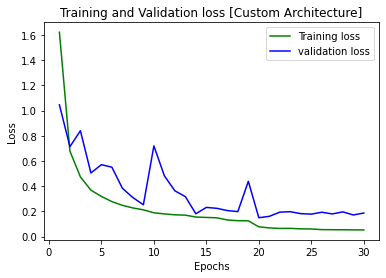

time: 152 ms (started: 2021-01-17 13:53:51 +00:00)


In [ ]:
loss_plot(range(1,31),history_own, " [Custom Architecture]")

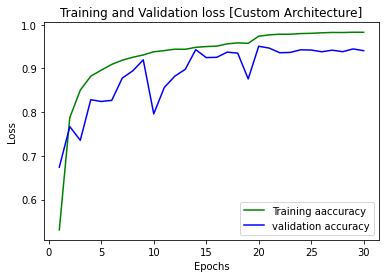

time: 139 ms (started: 2021-01-17 13:56:53 +00:00)


In [ ]:
accuracy_plot(range(1,31),history_own, " [Custom Architecture]")

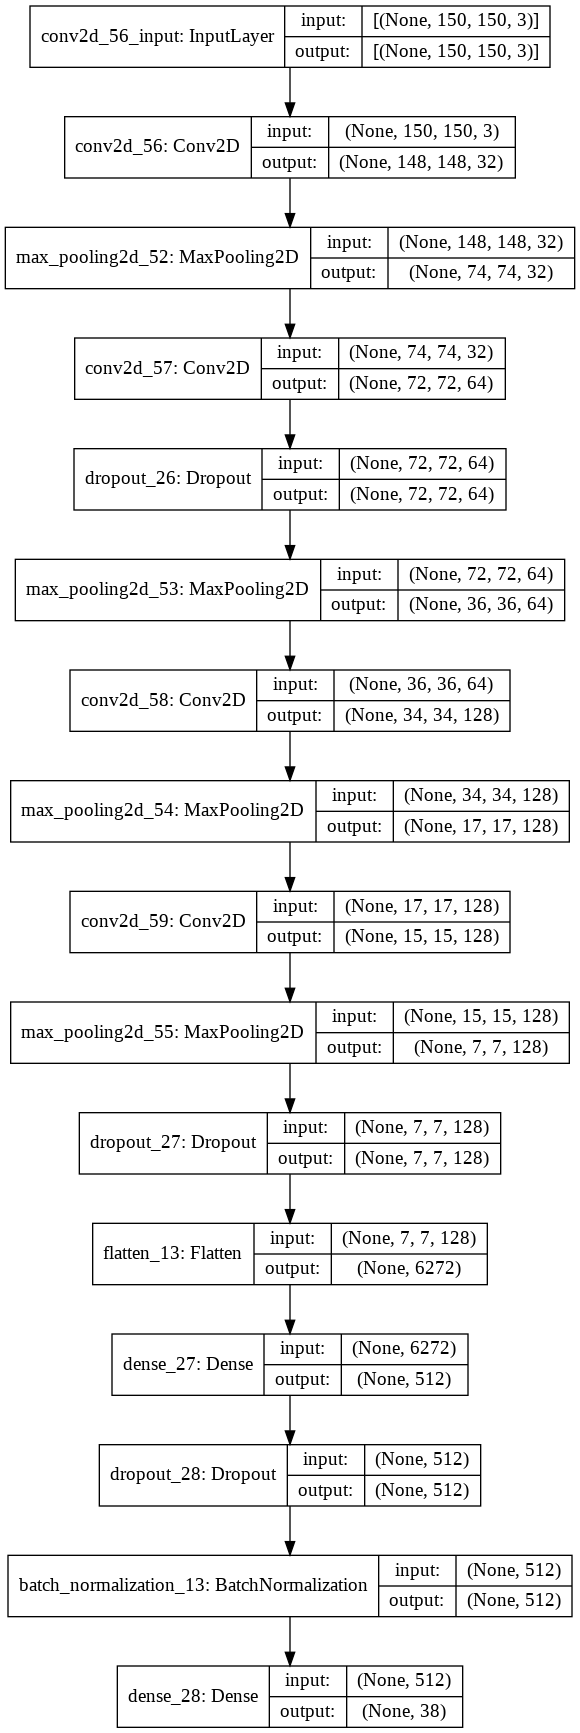

time: 183 ms (started: 2021-01-17 13:56:53 +00:00)


In [ ]:

plot_model(cust_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
predict = cust_model.predict(test_generator)
predicted_classes = predict.argmax(axis=-1)

time: 25.9 s (started: 2021-01-17 13:58:25 +00:00)


In [ ]:
true_classes = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())

time: 872 µs (started: 2021-01-17 13:58:51 +00:00)


In [ ]:
import sklearn.metrics as metrics
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.99      0.98      0.99       504
                                 Apple___Black_rot       0.90      1.00      0.95       497
                          Apple___Cedar_apple_rust       1.00      1.00      1.00       440
                                   Apple___healthy       0.89      1.00      0.94       502
                               Blueberry___healthy       0.99      0.96      0.98       454
          Cherry_(including_sour)___Powdery_mildew       1.00      0.98      0.99       421
                 Cherry_(including_sour)___healthy       1.00      0.92      0.96       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.94      0.97      0.95       410
                       Corn_(maize)___Common_rust_       1.00      1.00      1.00       477
               Corn_(maize)___Northern_Leaf_Blight       0.97      0.94      0.

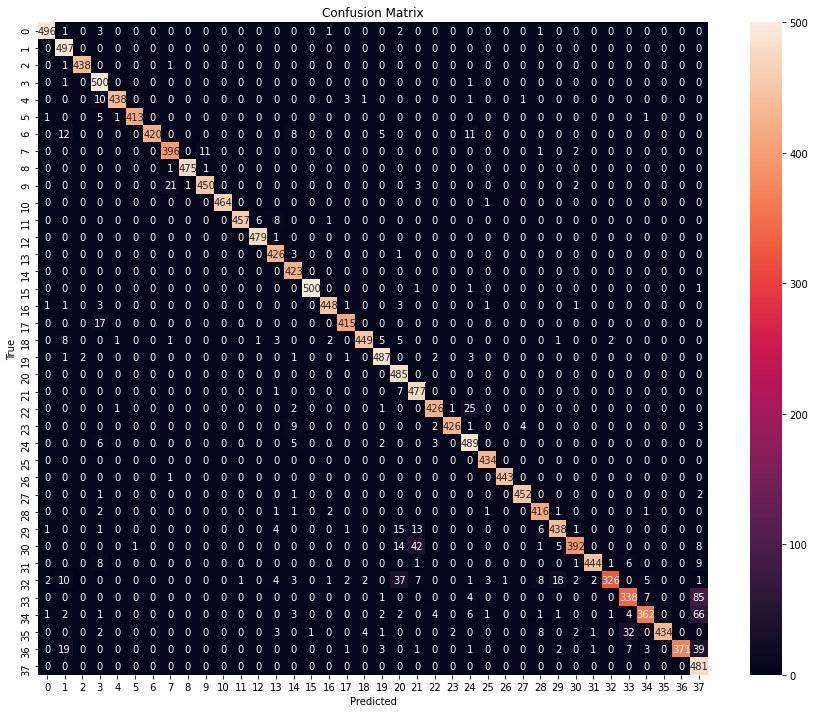

time: 3.38 s (started: 2021-01-17 14:05:27 +00:00)


In [ ]:
import seaborn as sns
data = tf.math.confusion_matrix(labels = true_classes,predictions = predicted_classes)
plt.figure(figsize=(15,12))
sns.heatmap(data, fmt='d',annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Training using SOTA model :VGG-19

VGG-19 is a convolutional neural network that is 19 layers deep.
<img src = "https://miro.medium.com/max/798/1*cufAO77aeSWdShs3ba5ndg.jpeg" height = 400, length = 600>

In [ ]:
from keras.applications import VGG19
import keras

from keras.applications.vgg19 import preprocess_input as vgg19_preprocess_input

vgg = VGG19(include_top=False, weights='imagenet', input_shape=(150,150,3))

for layer in vgg.layers[:16]:
  layer.trainable = False

In [ ]:
last_layer = vgg.get_layer('block5_pool')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output



last layer output shape:  (None, 4, 4, 512)


In [ ]:
#for vgg19

x = layers.Flatten()(last_output)

x = layers.Dense(1024, activation = "relu")(x)

x = layers.Dropout(0.4)(x)

x = layers.BatchNormalization()(x)

x = layers.Dense(38, activation = "softmax")(x)

model_vgg = Model(vgg.input, x)

model_vgg.compile(optimizer = RMSprop(lr=0.0001),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy']
             )

In [ ]:
model_vgg.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0   

In [ ]:
history_vgg = model_vgg.fit(
      train_generator,
      callbacks=[ mcp_save_vgg, reduce_lr_loss,earlyStopping],
      validation_data = validation_generator,
      epochs = 50,
      verbose = 1,
 )

Epoch 1/50
550/550 [==============================] - 467s 848ms/step - loss: 1.3538 - accuracy: 0.6079 - val_loss: 0.5372 - val_accuracy: 0.8433
Epoch 2/50
550/550 [==============================] - 458s 832ms/step - loss: 0.3321 - accuracy: 0.8940 - val_loss: 0.3037 - val_accuracy: 0.9053
Epoch 3/50
550/550 [==============================] - 458s 833ms/step - loss: 0.2297 - accuracy: 0.9243 - val_loss: 0.2067 - val_accuracy: 0.9323
Epoch 4/50
550/550 [==============================] - 460s 837ms/step - loss: 0.1819 - accuracy: 0.9384 - val_loss: 0.1798 - val_accuracy: 0.9438
Epoch 5/50
550/550 [==============================] - 459s 834ms/step - loss: 0.1516 - accuracy: 0.9498 - val_loss: 0.2121 - val_accuracy: 0.9318
Epoch 6/50
550/550 [==============================] - 460s 836ms/step - loss: 0.1331 - accuracy: 0.9557 - val_loss: 0.2348 - val_accuracy: 0.9323
Epoch 7/50
550/550 [==============================] - 460s 836ms/step - loss: 0.1164 - accuracy: 0.9617 - val_loss: 0.2060 -

In [ ]:
model_vgg.load_weights('mdl_wts_vgg.hdf5')

In [ ]:
model_stats(history_vgg)

Mean Accuracy of Test set 96.5385271443261
Lowest Accuracy of Test set 84.3273401260376
Highest Accuracy of Test set 98.76508116722107
******************************
Mean Accuracy of Training set 97.33444799979529
Lowest Accuracy of Training 75.76498985290527
Highest Accuracy of Training 99.57038164138794


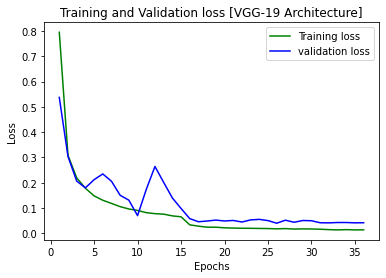

In [ ]:
loss_plot(range(1,37),history_vgg, " [VGG-19 Architecture]")

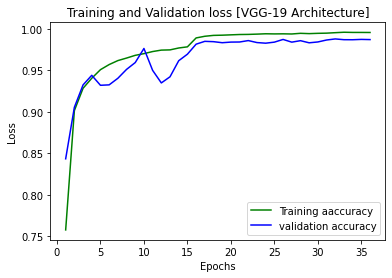

In [ ]:
accuracy_plot(range(1,37),history_vgg, " [VGG-19 Architecture]")

In [ ]:
predict = model_vgg.predict(test_generator)
predicted_classes = predict.argmax(axis=-1)

In [ ]:
true_classes = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())

In [ ]:
import sklearn.metrics as metrics
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       1.00      0.98      0.99       504
                                 Apple___Black_rot       0.99      1.00      0.99       497
                          Apple___Cedar_apple_rust       1.00      1.00      1.00       440
                                   Apple___healthy       0.97      1.00      0.99       502
                               Blueberry___healthy       1.00      0.99      0.99       454
          Cherry_(including_sour)___Powdery_mildew       1.00      1.00      1.00       421
                 Cherry_(including_sour)___healthy       0.99      1.00      1.00       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.96      0.97      0.96       410
                       Corn_(maize)___Common_rust_       0.99      1.00      1.00       477
               Corn_(maize)___Northern_Leaf_Blight       0.97      0.96      0.

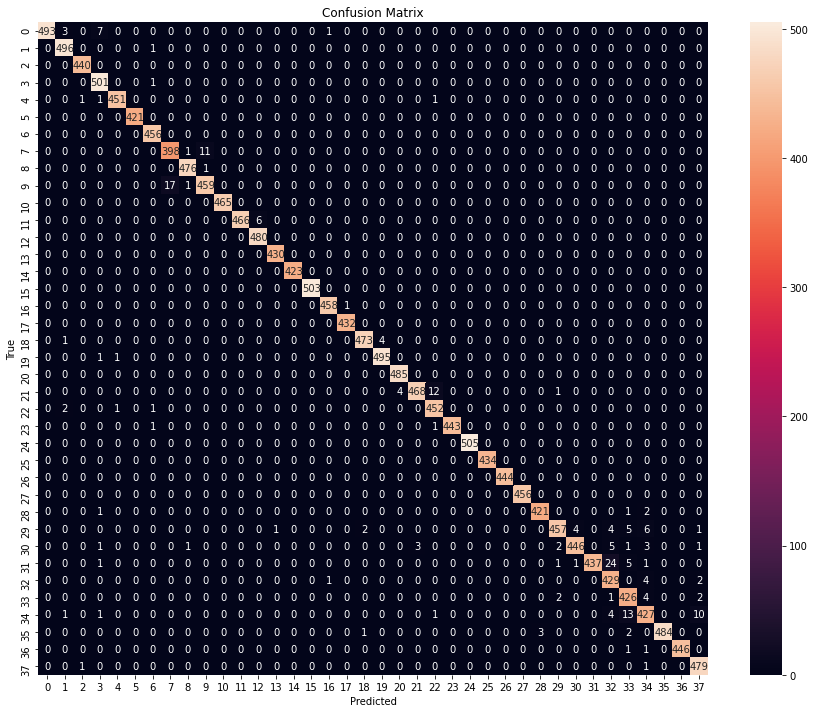

In [ ]:
import seaborn as sns
data = tf.math.confusion_matrix(labels = true_classes,predictions = predicted_classes)
plt.figure(figsize=(15,12))
sns.heatmap(data, fmt='d',annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Training using SOTA model :Xception

Xception Model is proposed by Francois Chollet. Xception is an extension of the inception Architecture which replaces the standard Inception modules with depthwise Separable Convolutions
<img src = "https://miro.medium.com/max/750/1*459jKxLPM9R-Y_z0y8SXug.png" height = 400>


In [ ]:
from keras.applications import Xception

In [ ]:
pre_model = Xception( input_shape = (150, 150,3), include_top = False , weights = "imagenet")

83689472/83683744 [==============================] - 1s 0us/step


In [ ]:
for layer in pre_model.layers[:60]:
  layer.trainable = False

In [ ]:
pre_model.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 74, 74, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 74, 74, 32)   0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [ ]:
last_layer = pre_model.get_layer('block14_sepconv2_act')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output



last layer output shape:  (None, 5, 5, 2048)


In [ ]:
#for xception
x = layers.Flatten()(last_output)

x = layers.Dense(1024, activation = "relu")(x)

x = layers.Dropout(0.4)(x)

x = layers.BatchNormalization()(x)

x = layers.Dense(38, activation = "softmax")(x)

model_xception = Model(pre_model.input, x)

model_xception.compile(optimizer = RMSprop(lr=0.0001),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy']
             )

In [ ]:
history_xc = model_xception.fit(
      train_generator,
      callbacks=[ mcp_save_xc, reduce_lr_loss,earlyStopping],
      validation_data = validation_generator,
      epochs = 40,
      verbose = 1,
 )

Epoch 1/40
550/550 [==============================] - 574s 1s/step - loss: 0.3853 - accuracy: 0.8886 - val_loss: 0.1234 - val_accuracy: 0.9648
Epoch 2/40
550/550 [==============================] - 578s 1s/step - loss: 0.1060 - accuracy: 0.9655 - val_loss: 0.0861 - val_accuracy: 0.9725
Epoch 3/40
550/550 [==============================] - 577s 1s/step - loss: 0.0680 - accuracy: 0.9777 - val_loss: 0.0573 - val_accuracy: 0.9832
Epoch 4/40
550/550 [==============================] - 582s 1s/step - loss: 0.0522 - accuracy: 0.9834 - val_loss: 0.0588 - val_accuracy: 0.9821
Epoch 5/40
550/550 [==============================] - 593s 1s/step - loss: 0.0394 - accuracy: 0.9871 - val_loss: 0.0342 - val_accuracy: 0.9894
Epoch 6/40
550/550 [==============================] - 584s 1s/step - loss: 0.0349 - accuracy: 0.9890 - val_loss: 0.0511 - val_accuracy: 0.9849
Epoch 7/40
550/550 [==============================] - 584s 1s/step - loss: 0.0284 - accuracy: 0.9903 - val_loss: 0.0565 - val_accuracy: 0.9847

In [ ]:
model_xception.load_weights('mdl_wts_xc.hdf5')

In [ ]:
model_stats(history_xc)

Mean Accuracy of Test set 99.18935032267319
Lowest Accuracy of Test set 96.48303985595703
Highest Accuracy of Test set 99.62440133094788
******************************
Mean Accuracy of Training set 99.33157594580399
Lowest Accuracy of Training 93.05071234703064
Highest Accuracy of Training 99.92175698280334


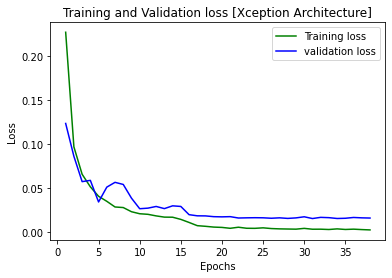

In [ ]:
loss_plot(range(1,39),history_xc, " [Xception Architecture]")

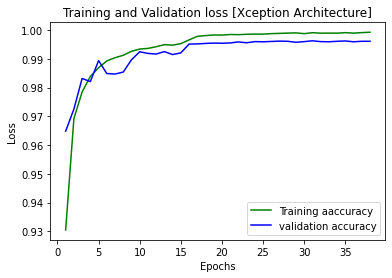

In [ ]:
accuracy_plot(range(1,39),history_xc, " [Xception Architecture]")

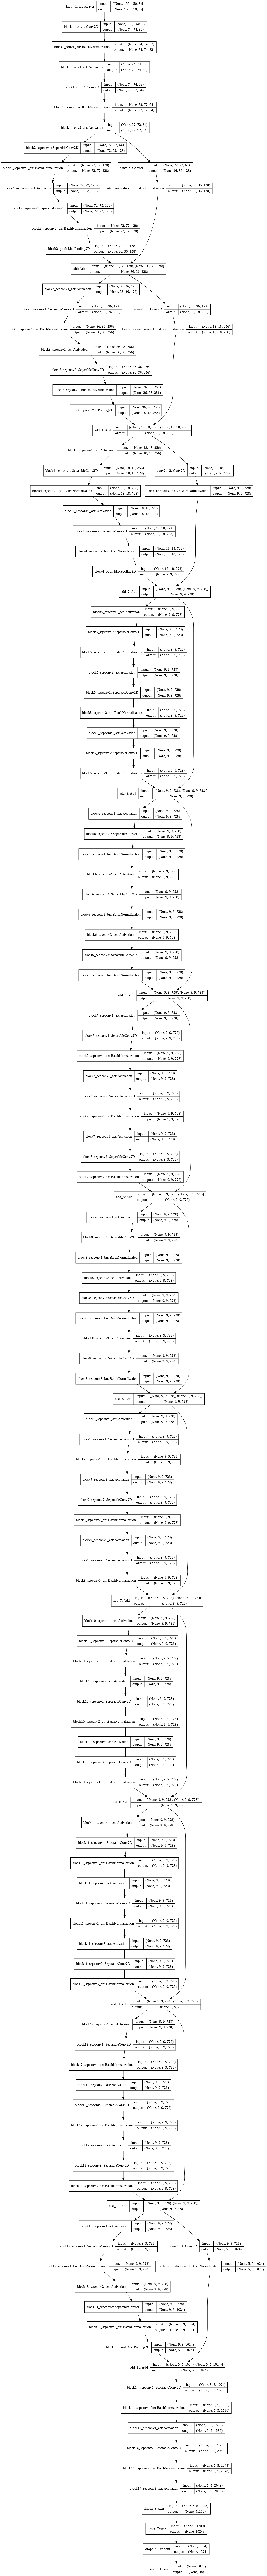

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model_new, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
predict = model_xception.predict(test_generator)
predicted_classes = predict.argmax(axis=-1)

In [ ]:
true_classes = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())

In [ ]:
import sklearn.metrics as metrics
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       1.00      0.99      1.00       504
                                 Apple___Black_rot       1.00      1.00      1.00       497
                          Apple___Cedar_apple_rust       1.00      1.00      1.00       440
                                   Apple___healthy       0.99      1.00      1.00       502
                               Blueberry___healthy       1.00      1.00      1.00       454
          Cherry_(including_sour)___Powdery_mildew       1.00      1.00      1.00       421
                 Cherry_(including_sour)___healthy       1.00      1.00      1.00       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.97      0.98      0.97       410
                       Corn_(maize)___Common_rust_       1.00      1.00      1.00       477
               Corn_(maize)___Northern_Leaf_Blight       0.98      0.97      0.

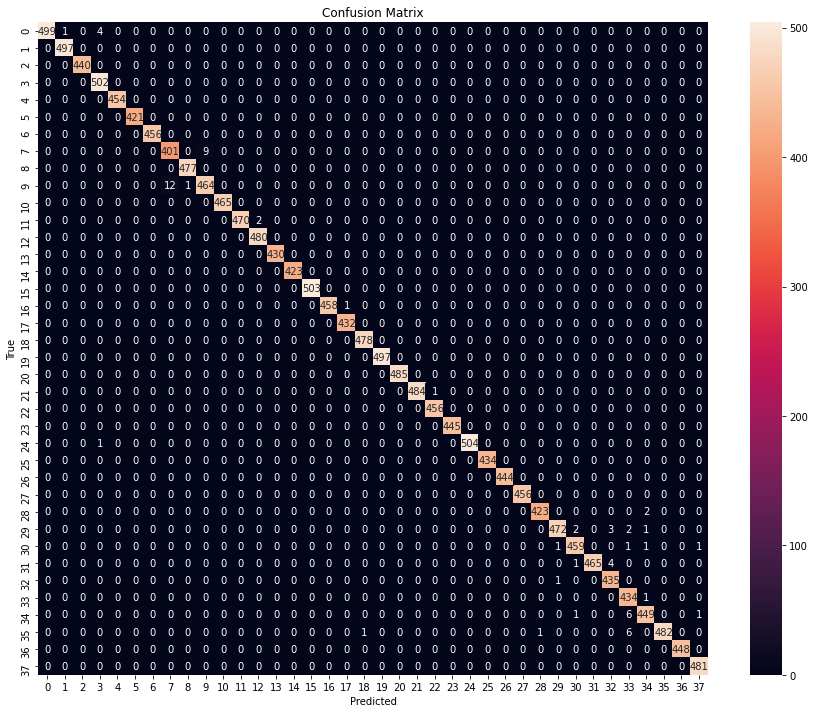

In [ ]:
import seaborn as sns
data = tf.math.confusion_matrix(labels = true_classes,predictions = predicted_classes)
plt.figure(figsize=(15,12))
sns.heatmap(data, fmt='d',annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### Vizualising incorrect predictions

In [ ]:
incorrects = np.nonzero(predicted_classes!= true_classes)

In [ ]:
incorrects


(array([  299,   410,   411,   473,   493,  3299,  3341,  3383,  3402,
         3493,  3513,  3566,  3600,  3671,  4195,  4258,  4262,  4263,
         4361,  4376,  4378,  4384,  4399,  4433,  4434,  4443,  4494,
         5520,  5521,  7847,  9796, 11278, 13122, 13405, 13427, 13431,
        13455, 13465, 13615, 13638, 13668, 13785, 13903, 14289, 14307,
        14312, 14411, 14413, 14518, 14534, 14628, 15209, 15452, 15719,
        15750, 15813, 15938, 16110, 16117, 16120, 16124, 16207, 16226,
        16253, 16326, 16565, 16579, 16582, 16637]),)

Label :Apple___Apple_scab(0)


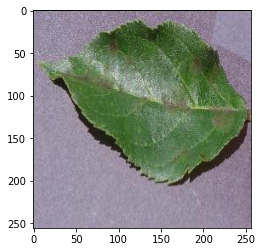

In [ ]:
show_image(*train[473])

# Comparing Models

In [ ]:
data = {'Highest Accuracy (Test)' :['99.62%', '98.76%', '95.06%'],
        'Highest Accuracy (Train)':['99.92%', '99.57%', '98.27%'],
        'Lowest Loss (Test)': [0.0154, 0.0415, 0.1502]}


df = pd.DataFrame(data, index =['Xception',
                                'VGG-19',
                                'Custom Architecture',
                                ])
df

Highest Accuracy (Test)  ... Lowest Loss (Test)
Xception                             99.62%  ...             0.0154
VGG-19                               98.76%  ...             0.0415
Custom Architecture                  95.06%  ...             0.1502

[3 rows x 3 columns]